In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
import torch
import torch.nn.functional as F
from PIL import Image
import numpy as np

import sys
sys.path.append('../')
from _utils import derivative5

Load the Dali image and convert to `PyTorch` tensor

In [2]:
image_path = "/mnt/data_drive/hrodrigo/mri_rician_noise/deep-image-prior/dali-bw.jpg"  # subject_04_Std0.15.png
img = Image.open(image_path).convert("L")
img_tensor = torch.FloatTensor(np.array(img)[None, ...])  # CxHxW
img_tensor = img_tensor[None, ...] # add batch dimension

Apply convolutions and do away with batch dimension

In [3]:
dx,dy=derivative5(img_tensor)


(-0.5, 508.5, 363.5, -0.5)

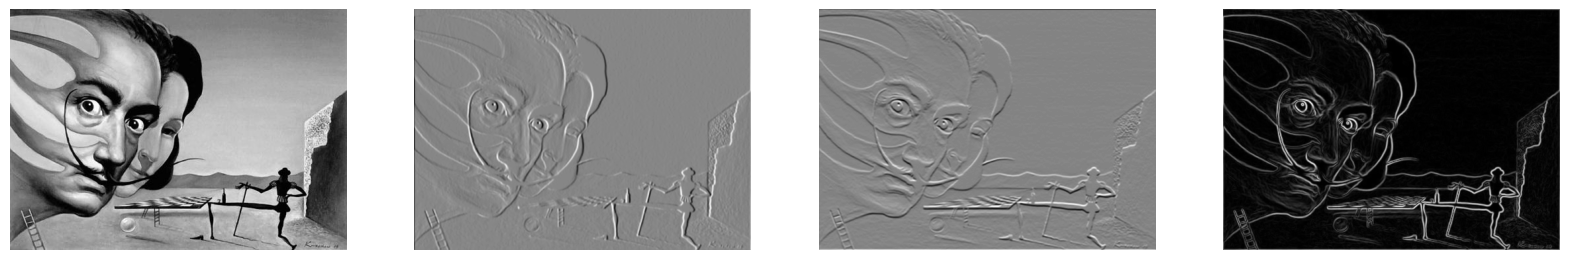

In [4]:
_, axs = plt.subplots(1, 4, figsize=(20,20))

axs[0].axis('off')
axs[0].imshow(img,cmap='gray')

axs[1].axis('off')
axs[1].imshow(dx.squeeze(), cmap='gray')

axs[2].axis('off')
axs[2].imshow(dy.squeeze(), cmap='gray')

axs[3].imshow(np.sqrt(dx**2+dy**2).squeeze(), cmap='gray')
axs[3].axis('off')
